<a href="https://colab.research.google.com/github/MLJ19/Scrapping-FRED/blob/main/Web_Scrapping.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ***Web Scrapping: Ej. Jumbo***

### Requests + BeautifulSoup + Selenium



*   Instalación e importación de paquetes para explorar, leer, extraer la informacion del html y trabajarla



In [1]:
from bs4 import BeautifulSoup
import requests as rs
!pip install selenium
import selenium
!apt-get update
!apt-get install -y chromium-browser
!apt install chromium-chromedriver
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.chrome.service import Service
!pip install google-colab-selenium
import google_colab_selenium as gs
import pandas as pd

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.5/9.5 MB 90.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 492.9/492.9 kB 25.8 MB/s eta 0:00:00
Hit:1 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:2 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [128 kB]
Get:3 http://security.ubuntu.com/ubuntu jammy-security InRelease [129 kB]
Get:4 http://archive.ubuntu.com/ubuntu jammy-backports InRelease [127 kB]
Get:5 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease [1,581 B]
Get:6 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,632 B]
Get:7 https://r2u.stat.illinois.edu/ubuntu jammy InRelease [6,555 B]
Hit:8 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Get:9 http://security.ubuntu.com/ubuntu jammy-security/multiverse amd64 Packages [56.4 kB]
Get:10 http://security.ubuntu.com/ubuntu jammy-security/restricted amd64 Packages [3,774 kB]
Hit:11 https://ppa.launchpadcontent.net/graphics-d

## Ejecutamos el driver de Chrome

In [2]:
driver = gs.Chrome()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [3]:
url = "https://www.jumbo.com.ar/almacen/aderezos/salsas-frias"

In [4]:
driver.get(url)

In [5]:
driver.save_screenshot("screen_shot.png")

True

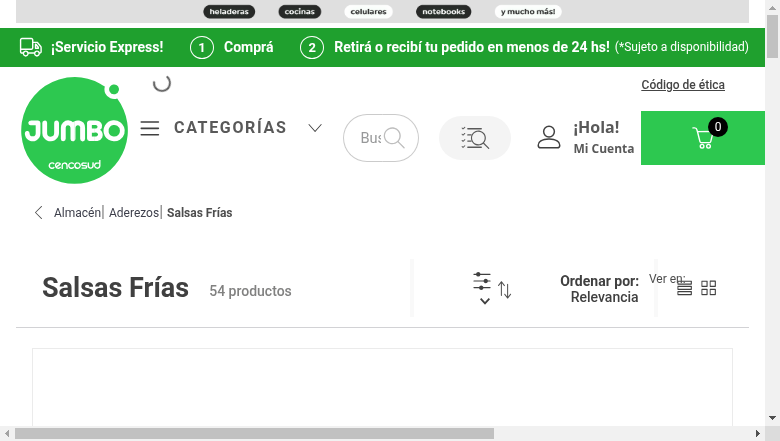

In [6]:
from IPython.display import Image
Image("screen_shot.png")

## Se indica el scrolleo de pagina web

In [7]:
driver.execute_script("window.scrollTo(0, document.body.scrollHeight);")

In [8]:
driver.save_screenshot("nuevo_screen_shot.png")

True

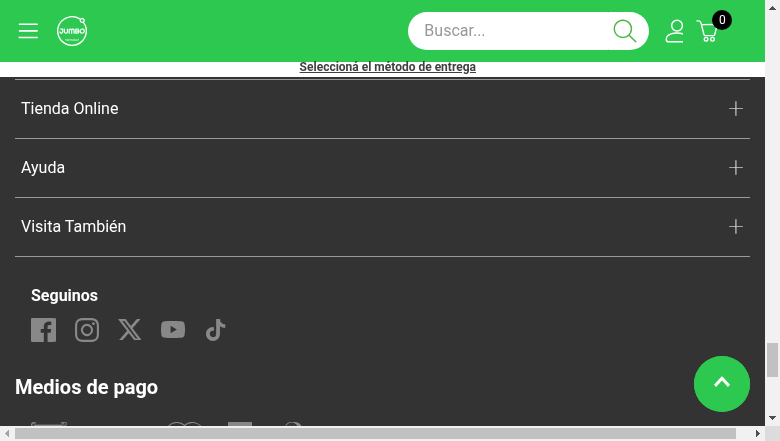

In [9]:
Image("nuevo_screen_shot.png")

# **Busqueda de los elementos**

### **1)** Nombres



In [10]:
names = driver.find_elements(By.TAG_NAME, "h2")

In [11]:
type(names)

list

In [12]:
len(names)

9

In [13]:
names[0]

<selenium.webdriver.remote.webelement.WebElement (session="84eaed5a5ad299815f12c55bcb3b9259", element="f.88F052E42388B86D23BCA934F83C93AF.d.13AEBA35C953FA829BCC24D5B4BDC896.e.129")>

### Check

In [14]:
names[0].text

'Salsa De Soja La Parmesana 300 Gr'

### Formamos la lista

In [15]:
titulos_articulos = [i.text for i in names]

In [16]:
print(titulos_articulos)

['Salsa De Soja La Parmesana 300 Gr', 'Salsa Caesar Light Dos Anclas 360 Gr', 'Salsa Barbacoa Danica X220g', 'Aderezo De Ajo Hellmanns 250 Gr', 'Salsa De Soja Cocinero Red Sod X500ml', 'Aderezo De Ajo Ahumado Hellmanns 250 Gr', '', 'Salsa Aji Picante Dos Anclas 260 Gr', 'Mayonesa La Campagnola 500 Gr']


## **2)** Precios

In [17]:
precios = driver.find_elements(By.CLASS_NAME, "jumboargentinaio-store-theme-1dCOMij_MzTzZOCohX1K7w")

### Check

In [18]:
len(precios)

8

In [19]:
precios[0]

<selenium.webdriver.remote.webelement.WebElement (session="84eaed5a5ad299815f12c55bcb3b9259", element="f.88F052E42388B86D23BCA934F83C93AF.d.13AEBA35C953FA829BCC24D5B4BDC896.e.138")>

In [20]:
precios[0].text

'$2.250'

In [21]:
[i.text for i in precios]

['$2.250',
 '$3.950',
 '$1.400',
 '$2.800',
 '$5.250',
 '$2.800',
 '$2.700',
 '$2.050']

# Proceso de limpieza de los datos

In [22]:
precios_limpios = [float(i.text.strip("$").replace(".","").replace(",",".")) for i in precios]

In [23]:
precios_limpios

[2250.0, 3950.0, 1400.0, 2800.0, 5250.0, 2800.0, 2700.0, 2050.0]

In [24]:
titulos_articulos

['Salsa De Soja La Parmesana 300 Gr',
 'Salsa Caesar Light Dos Anclas 360 Gr',
 'Salsa Barbacoa Danica X220g',
 'Aderezo De Ajo Hellmanns 250 Gr',
 'Salsa De Soja Cocinero Red Sod X500ml',
 'Aderezo De Ajo Ahumado Hellmanns 250 Gr',
 '',
 'Salsa Aji Picante Dos Anclas 260 Gr',
 'Mayonesa La Campagnola 500 Gr']

In [25]:
Titulos_correctos = [item for item in titulos_articulos if item.strip()]

print(Titulos_correctos)

['Salsa De Soja La Parmesana 300 Gr', 'Salsa Caesar Light Dos Anclas 360 Gr', 'Salsa Barbacoa Danica X220g', 'Aderezo De Ajo Hellmanns 250 Gr', 'Salsa De Soja Cocinero Red Sod X500ml', 'Aderezo De Ajo Ahumado Hellmanns 250 Gr', 'Salsa Aji Picante Dos Anclas 260 Gr', 'Mayonesa La Campagnola 500 Gr']


In [26]:
len(Titulos_correctos)

8

In [27]:
Titulos_correctos

['Salsa De Soja La Parmesana 300 Gr',
 'Salsa Caesar Light Dos Anclas 360 Gr',
 'Salsa Barbacoa Danica X220g',
 'Aderezo De Ajo Hellmanns 250 Gr',
 'Salsa De Soja Cocinero Red Sod X500ml',
 'Aderezo De Ajo Ahumado Hellmanns 250 Gr',
 'Salsa Aji Picante Dos Anclas 260 Gr',
 'Mayonesa La Campagnola 500 Gr']

# Se crea el DataFrame

In [28]:
Aderezos_jumbo = pd.DataFrame({"nombre_articulo": Titulos_correctos, "precio": precios_limpios, "Cadena": "Jumbo"})

In [29]:
Aderezos_jumbo

,nombre_articulo,precio,Cadena
0,Salsa De Soja La Parmesana 300 Gr,2250.0,Jumbo
1,Salsa Caesar Light Dos Anclas 360 Gr,3950.0,Jumbo
2,Salsa Barbacoa Danica X220g,1400.0,Jumbo
3,Aderezo De Ajo Hellmanns 250 Gr,2800.0,Jumbo
4,Salsa De Soja Cocinero Red Sod X500ml,5250.0,Jumbo
5,Aderezo De Ajo Ahumado Hellmanns 250 Gr,2800.0,Jumbo
6,Salsa Aji Picante Dos Anclas 260 Gr,2700.0,Jumbo
7,Mayonesa La Campagnola 500 Gr,2050.0,Jumbo


# **Ejemplo:** 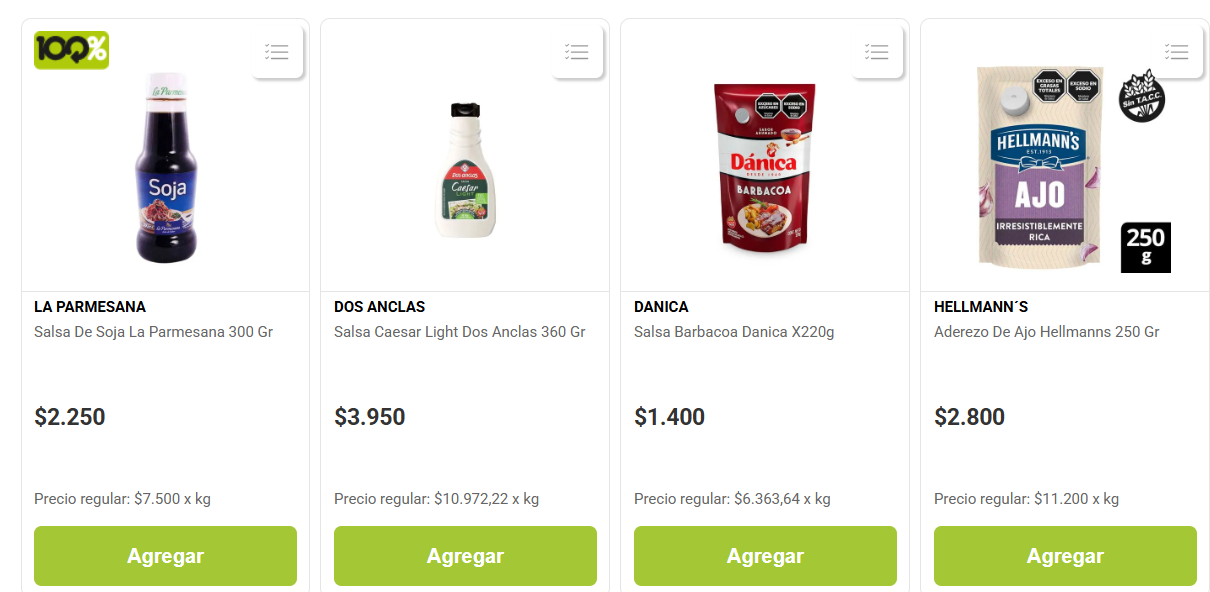

## Exporto a Excel

In [30]:
Aderezos_jumbo.to_excel("Scrapping_Jumbo.xlsx")